# チーモンチョウチュウ関連リツイートに向けての練習

In [1]:
from requests_oauthlib import OAuth1Session
import json
import settings

In [2]:
twitter = OAuth1Session(settings.CONSUMER_KEY, settings.CONSUMER_SECRET, settings.ACCESS_TOKEN, settings.ACCESS_TOKEN_SECRET)

### 基本

In [3]:
import search_word

In [20]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=10".format(word=search_word.chimon), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'], tweet_statuses['user']['name'], tweet_statuses['user']['screen_name'])

803769022437146629 Wed Nov 30 01:14:02 +0000 2016 kansaigeinin_bot kansaigeinin_bo
803768825493622784 Wed Nov 30 01:13:15 +0000 2016 適当斎@相互フォロー TEKITOUSAI
803765786774892544 Wed Nov 30 01:01:11 +0000 2016 たり shootingmsmn
803762220047822848 Wed Nov 30 00:47:01 +0000 2016 ひなは年パス切れてる( 'ω' ) Hina_jam
803754570820136960 Wed Nov 30 00:16:37 +0000 2016 颯希@ちちくりまんぼう rabuchtmon33
803747919111200768 Tue Nov 29 23:50:11 +0000 2016 つぐみ tu_lafu
803739883864866816 Tue Nov 29 23:18:15 +0000 2016 さ l___momo
803738391489585152 Tue Nov 29 23:12:19 +0000 2016 みずほ@笑垢 pajam_chi
803727703157313536 Tue Nov 29 22:29:51 +0000 2016 🗣むに muni_ccc
803722437955178496 Tue Nov 29 22:08:56 +0000 2016 きょん＠生配信専用垢。 kyonkyon_owarai


In [5]:
tweets['statuses']

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Tue Nov 29 05:08:08 +0000 2016',
  'entities': {'hashtags': [], 'symbols': [], 'urls': [], 'user_mentions': []},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 803465544129069056,
  'id_str': '803465544129069056',
  'in_reply_to_screen_name': None,
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'is_quote_status': False,
  'lang': 'ja',
  'metadata': {'iso_language_code': 'ja', 'result_type': 'recent'},
  'place': None,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="http://twittbot.net/" rel="nofollow">twittbot.net</a>',
  'text': 'ゴキひろしさん『チーモンはなんか仲悪いイメージないんだよなー』',
  'truncated': False,
  'user': {'contributors_enabled': False,
   'created_at': 'Thu Apr 05 03:34:52 +0000 2012',
   'default_profile': False,
   'default_profile_image': False,
   'description': 'チーモンチョーチュウの筍×キノコbot。菊白な萌え発言やレポをランダムに

## リツイート

In [4]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=2".format(word=search_word.chimon), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    tweet_id = tweet_statuses['id']
    params = {}
    print('***')
    print(tweet_statuses['text'])
    req = twitter.post("https://api.twitter.com/1.1/statuses/retweet/{tweet_id}.json".format(tweet_id=tweet_id),params = params)

***
RT @so_ra_no_ha: 笑クラって
ライセンスとノンスタイルとチーモンにハマった事がある人の率高い気がする
青い偏見？
***
昨日(12/1)のツイート数は、
馬鹿よ：53
チーモン：82
で、チーモンの勝ち！


### データ分析したい

In [26]:
import pandas as pd

In [27]:
df_tbl = pd.DataFrame(columns=['time', 'id'])

In [28]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=10".format(word=search_word.chimon), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'])
    df_addition_row = pd.DataFrame([[tweet_statuses['created_at'],tweet_statuses['id']]])
    df_addition_row.columns =["time","id"]
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803222081613623300 Mon Nov 28 13:00:42 +0000 2016
803214984771604480 Mon Nov 28 12:32:30 +0000 2016
803211406434713601 Mon Nov 28 12:18:16 +0000 2016
803208496766255104 Mon Nov 28 12:06:43 +0000 2016
803207676234633216 Mon Nov 28 12:03:27 +0000 2016
803207421497786368 Mon Nov 28 12:02:26 +0000 2016
803207128508837888 Mon Nov 28 12:01:16 +0000 2016
803207057088204800 Mon Nov 28 12:00:59 +0000 2016
803195895927869445 Mon Nov 28 11:16:38 +0000 2016


In [29]:
df_tbl

,time,id
0,Mon Nov 28 13:00:42 +0000 2016,8.032221e+17
0,Mon Nov 28 12:32:30 +0000 2016,8.032150e+17
0,Mon Nov 28 12:18:16 +0000 2016,8.032114e+17
0,Mon Nov 28 12:06:43 +0000 2016,8.032085e+17
0,Mon Nov 28 12:03:27 +0000 2016,8.032077e+17
0,Mon Nov 28 12:02:26 +0000 2016,8.032074e+17
0,Mon Nov 28 12:01:16 +0000 2016,8.032071e+17
0,Mon Nov 28 12:00:59 +0000 2016,8.032071e+17
0,Mon Nov 28 11:16:38 +0000 2016,8.031959e+17


### 時間軸で分析したい

In [30]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['week','month','day','time','jisa','year'])

In [31]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=100".format(word=search_word.chimon), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    print(tweet_statuses['id'], tweet_statuses['created_at'])
    time = tweet_statuses['created_at'].split(' ')
    df_addition_row = pd.DataFrame([[time[0], time[1], time[2], time[3], time[4], time[5]]])
    df_addition_row.columns = ['week','month','day','time','jisa','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803222081613623300 Mon Nov 28 13:00:42 +0000 2016
803214984771604480 Mon Nov 28 12:32:30 +0000 2016
803211406434713601 Mon Nov 28 12:18:16 +0000 2016
803208496766255104 Mon Nov 28 12:06:43 +0000 2016
803207676234633216 Mon Nov 28 12:03:27 +0000 2016
803207421497786368 Mon Nov 28 12:02:26 +0000 2016
803207128508837888 Mon Nov 28 12:01:16 +0000 2016
803207057088204800 Mon Nov 28 12:00:59 +0000 2016
803195895927869445 Mon Nov 28 11:16:38 +0000 2016
803186094875426817 Mon Nov 28 10:37:42 +0000 2016
803176675953389568 Mon Nov 28 10:00:16 +0000 2016
803173261756416001 Mon Nov 28 09:46:42 +0000 2016
803169999263121410 Mon Nov 28 09:33:44 +0000 2016
803158123137507328 Mon Nov 28 08:46:33 +0000 2016
803150182141464576 Mon Nov 28 08:14:59 +0000 2016
803147554926067712 Mon Nov 28 08:04:33 +0000 2016
803146496694632449 Mon Nov 28 08:00:21 +0000 2016
803143553488560128 Mon Nov 28 07:48:39 +0000 2016
803140516879532034 Mon Nov 28 07:36:35 +0000 2016
803134998664486912 Mon Nov 28 07:14:39 +0000 2016


In [32]:
df_tbl

,week,month,day,time,jisa,year
0,Mon,Nov,28,13:00:42,+0000,2016
0,Mon,Nov,28,12:32:30,+0000,2016
0,Mon,Nov,28,12:18:16,+0000,2016
0,Mon,Nov,28,12:06:43,+0000,2016
0,Mon,Nov,28,12:03:27,+0000,2016
0,Mon,Nov,28,12:02:26,+0000,2016
0,Mon,Nov,28,12:01:16,+0000,2016
0,Mon,Nov,28,12:00:59,+0000,2016
0,Mon,Nov,28,11:16:38,+0000,2016
0,Mon,Nov,28,10:37:42,+0000,2016


In [33]:
df_tbl.groupby('day').count()

,week,month,time,jisa,year
day,,,,,
26,12,12,12,12,12
27,57,57,57,57,57
28,31,31,31,31,31


### SQLITE3に登録しておきたい

create table chimon_time(
    id int primary key,
    week varchar,
    month varchar,
    day int,
    time varchar,
    jisa varchar,
    year int
)

In [4]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [5]:
query = '''
SELECT max(id) FROM chimon_time
'''
maxid = c.execute(query)

In [6]:
list_maxid = c.fetchall()
max_id = list_maxid[0][0]

In [7]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['id', 'week','month','day','time','jisa','year'])

In [8]:
if max_id == None:
    max_id = 0

In [9]:
params = {}
req = twitter.get("https://api.twitter.com/1.1/search/tweets.json?q={word}&count=100".format(word=search_word.chimon), params = params)
tweets = json.loads(req.text)
for tweet_statuses in tweets['statuses']:
    tweet_id = tweet_statuses['id']
    time = tweet_statuses['created_at'].split(' ')
    if tweet_id > max_id:
        print(tweet_statuses['id'], tweet_statuses['created_at'])
        insert_query = '''
        INSERT INTO chimon_time VALUES({tweet_id}, '{t1}', '{t2}', {t3}, '{t4}', '{t5}', {t6})
        '''.format(tweet_id=tweet_id,t1=time[0],t2=time[1],t3=time[2],t4=time[3],t5=time[4],t6=time[5])
        c.execute(insert_query)
    
        df_addition_row = pd.DataFrame([[tweet_id, time[0], time[1], time[2], time[3], time[4], time[5]]])
        df_addition_row.columns = ['id', 'week','month','day','time','jisa','year']
        df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

803523420772134912 Tue Nov 29 08:58:06 +0000 2016
803522143283650560 Tue Nov 29 08:53:02 +0000 2016
803518638393167872 Tue Nov 29 08:39:06 +0000 2016
803508885298376705 Tue Nov 29 08:00:21 +0000 2016
803495953399328768 Tue Nov 29 07:08:58 +0000 2016
803488599891005440 Tue Nov 29 06:39:44 +0000 2016
803465544129069056 Tue Nov 29 05:08:08 +0000 2016
803460102686527488 Tue Nov 29 04:46:30 +0000 2016
803448787586797568 Tue Nov 29 04:01:32 +0000 2016
803429623547580416 Tue Nov 29 02:45:23 +0000 2016
803429622721318912 Tue Nov 29 02:45:23 +0000 2016


In [10]:
conn.commit()

In [11]:
conn.close()

In [48]:
df_tbl

,id,week,month,day,time,jisa,year
0,8.032278e+17,Mon,Nov,28,13:23:29,+0000,2016
0,8.032268e+17,Mon,Nov,28,13:19:38,+0000,2016
0,8.032264e+17,Mon,Nov,28,13:17:44,+0000,2016
0,8.032185e+17,Mon,Nov,28,12:46:39,+0000,2016
0,8.032162e+17,Mon,Nov,28,12:37:26,+0000,2016
0,8.032147e+17,Mon,Nov,28,12:31:26,+0000,2016
0,8.032112e+17,Mon,Nov,28,12:17:25,+0000,2016
0,8.032088e+17,Mon,Nov,28,12:08:01,+0000,2016
0,8.032074e+17,Mon,Nov,28,12:02:10,+0000,2016
0,8.031933e+17,Mon,Nov,28,11:06:12,+0000,2016


### 日ごとのツイート数

In [54]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [57]:
query = '''
SELECT count(id), month, day, year FROM chimon_time GROUP BY month, day, year
'''
count_id = c.execute(query)

In [58]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['count_id','month','day','year'])

In [59]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1], row[2], row[3]]])
    df_addition_row.columns = ['count_id','month','day','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(68, 'Nov', 27, 2016)
(32, 'Nov', 28, 2016)


In [60]:
df_tbl

,count_id,month,day,year
0,68.0,Nov,27.0,2016.0
0,32.0,Nov,28.0,2016.0


### 描画したい

In [61]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

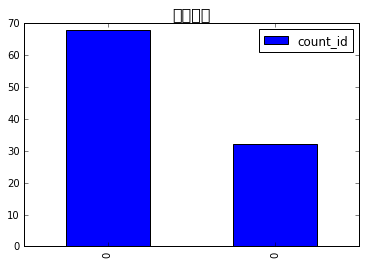

In [62]:
df_tbl.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)

### DBにあるデータをすべて取ってくる

In [128]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [129]:
query = '''
SELECT * FROM chimon_time
'''
count_id = c.execute(query)

In [130]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['id', 'week','month','day','time','jisa','year'])

In [131]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1], row[2], row[3], row[4], row[5], row[6]]])
    df_addition_row.columns = ['id', 'week','month','day','time','jisa','year']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(803216227845799937, 'Mon', 'Nov', 28, '12:37:26', '+0000', 2016)
(803214717716086784, 'Mon', 'Nov', 28, '12:31:26', '+0000', 2016)
(803211189412995072, 'Mon', 'Nov', 28, '12:17:25', '+0000', 2016)
(803208824316301312, 'Mon', 'Nov', 28, '12:08:01', '+0000', 2016)
(803207354586042368, 'Mon', 'Nov', 28, '12:02:10', '+0000', 2016)
(803193267655352320, 'Mon', 'Nov', 28, '11:06:12', '+0000', 2016)
(803190396649996288, 'Mon', 'Nov', 28, '10:54:47', '+0000', 2016)
(803188011571609600, 'Mon', 'Nov', 28, '10:45:19', '+0000', 2016)
(803175166821838848, 'Mon', 'Nov', 28, '09:54:16', '+0000', 2016)
(803175032604135424, 'Mon', 'Nov', 28, '09:53:44', '+0000', 2016)
(803174484278550528, 'Mon', 'Nov', 28, '09:51:33', '+0000', 2016)
(803171703413051392, 'Mon', 'Nov', 28, '09:40:30', '+0000', 2016)
(803168691055685632, 'Mon', 'Nov', 28, '09:28:32', '+0000', 2016)
(803162373481603074, 'Mon', 'Nov', 28, '09:03:26', '+0000', 2016)
(803156754385158144, 'Mon', 'Nov', 28, '08:41:06', '+0000', 2016)
(803156718

In [132]:
df_tbl

,id,week,month,day,time,jisa,year
0,8.032162e+17,Mon,Nov,28.0,12:37:26,+0000,2016.0
0,8.032147e+17,Mon,Nov,28.0,12:31:26,+0000,2016.0
0,8.032112e+17,Mon,Nov,28.0,12:17:25,+0000,2016.0
0,8.032088e+17,Mon,Nov,28.0,12:08:01,+0000,2016.0
0,8.032074e+17,Mon,Nov,28.0,12:02:10,+0000,2016.0
0,8.031933e+17,Mon,Nov,28.0,11:06:12,+0000,2016.0
0,8.031904e+17,Mon,Nov,28.0,10:54:47,+0000,2016.0
0,8.031880e+17,Mon,Nov,28.0,10:45:19,+0000,2016.0
0,8.031752e+17,Mon,Nov,28.0,09:54:16,+0000,2016.0
0,8.031750e+17,Mon,Nov,28.0,09:53:44,+0000,2016.0


### 曜日ごとのツイート

In [12]:
import sqlite3
conn = sqlite3.connect('bakayo_VS_chimon.db')
c = conn.cursor()

In [13]:
query = '''
SELECT count(id), week FROM chimon_time GROUP BY week
'''
count_id = c.execute(query)

In [17]:
import pandas as pd
df_tbl = pd.DataFrame(columns=['count_id','week'])

In [18]:
for row in count_id:
    print(row)
    df_addition_row = pd.DataFrame([[row[0], row[1]]])
    df_addition_row.columns = ['count_id','week']
    df_tbl = pd.concat([df_tbl,df_addition_row],axis=0)

(81, 'Mon')
(56, 'Sat')
(142, 'Sun')
(53, 'Thu')
(110, 'Tue')
(62, 'Wed')


In [19]:
df_tbl

,count_id,week
0,81.0,Mon
0,56.0,Sat
0,142.0,Sun
0,53.0,Thu
0,110.0,Tue
0,62.0,Wed


In [20]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

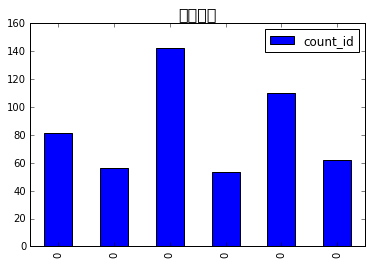

In [21]:
df_tbl.plot.bar(y=['count_id'])
plt.title(u'棒グラフ', size=16)